# 匯入 TED 資料
資料來源：https://wit3.fbk.eu/mono.php?release=XML_releases&tinfo=cleanedhtml_ted <br>
收錄各國語言的 TED 演講

In [1]:
import xml.etree.ElementTree as et
tree = et.ElementTree(file='ted_zh-tw-20160408.xml')

In [2]:
doc_list = []
for elem in tree.iter(tag='content'):
    doc_list.append(elem.text)

# 中文預處理

In [3]:
punctuation = set()
with open ('punctuation_zh_tw.txt', 'r') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
with open ('punctuation_en.txt', 'r') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
punctuation.add('\n')
punctuation.add(' ')

stopwords = set()
with open ('stopwords_zh_tw.txt', 'r') as f:
    for line in f.readlines():
        stopwords.add(line.strip())

In [4]:
import jieba
import jieba.posseg as pseg
jieba.load_userdict("dict.txt.big.tw")
doc_wordlist = dict()
for i in range(len(doc_list)):
    words = [word for word in jieba.cut(doc_list[i]) if word not in punctuation and word not in stopwords]
    doc_wordlist.update({i:" ".join(words)})

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/fm/3k9k8cq55zn_bw88_6fybf300000gn/T/jieba.cache
Loading model cost 0.539 seconds.
Prefix dict has been built successfully.


# 文本向量化（使用基於詞頻的詞袋模型）
LDA 的設計是基於詞頻，所以使用其他如 tf-idf 建模效果可能較差 <br>
<b>CountVectorizer(max_df, max_features, stop_words)</b>
- max_df: 丟棄出現在高於多少比例(float)或數量(int)的文件中之單詞（corpus-specific stop words）
- min_df: 丟棄出現在低於多少比例(float)或數量(int)的文件中之單詞
- max_features: 丟棄單詞後，最多使用多少單詞來建模（頻率由高至低排序）
- stop_words: 'english' 或輸入一個 stop_words list<br>

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = list(doc_wordlist.values())
cv = CountVectorizer(min_df=0.01, max_df=0.5, max_features=10000)
cv_features = cv.fit_transform(corpus)

In [6]:
print(cv_features)

  (0, 1787)	11
  (0, 6449)	3
  (0, 5029)	1
  (0, 6400)	1
  (0, 6419)	3
  (0, 2031)	34
  (0, 1082)	2
  (0, 5178)	1
  (0, 2384)	1
  (0, 5185)	1
  (0, 2395)	2
  (0, 184)	3
  (0, 5044)	3
  (0, 1903)	2
  (0, 5013)	1
  (0, 5866)	7
  (0, 2905)	13
  (0, 3533)	11
  (0, 6528)	1
  (0, 622)	2
  (0, 790)	1
  (0, 3401)	2
  (0, 3859)	5
  (0, 5592)	2
  (0, 4763)	1
  :	:
  (2012, 1651)	1
  (2012, 4044)	1
  (2012, 807)	1
  (2012, 4246)	1
  (2012, 2835)	1
  (2012, 5773)	1
  (2012, 3571)	1
  (2012, 7115)	1
  (2012, 445)	1
  (2012, 7680)	1
  (2012, 4221)	1
  (2012, 5768)	1
  (2012, 2988)	1
  (2012, 4219)	1
  (2012, 689)	1
  (2012, 4113)	1
  (2012, 5202)	1
  (2012, 7250)	1
  (2012, 6070)	2
  (2012, 656)	1
  (2012, 6227)	1
  (2012, 4865)	1
  (2012, 767)	1
  (2012, 2875)	1
  (2012, 1800)	1


In [7]:
cv.get_feature_names()

['000',
 '10',
 '100',
 '1000',
 '11',
 '110',
 '12',
 '120',
 '13',
 '130',
 '14',
 '140',
 '15',
 '150',
 '1500',
 '16',
 '160',
 '17',
 '170',
 '18',
 '180',
 '1800',
 '19',
 '1900',
 '1930',
 '1940',
 '1945',
 '1950',
 '1960',
 '1968',
 '1970',
 '1973',
 '1975',
 '1976',
 '1980',
 '1982',
 '1984',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2015',
 '2020',
 '2030',
 '2050',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250',
 '2500',
 '26',
 '27',
 '28',
 '29',
 '30',
 '300',
 '3000',
 '31',
 '32',
 '33',
 '34',
 '35',
 '350',
 '36',
 '360',
 '37',
 '38',
 '3d',
 '40',
 '400',
 '4000',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '50',
 '500',
 '5000',
 '52',
 '55',
 '60',
 '600',
 '6000',
 '64',
 '65',
 '68',
 '70',
 '700',
 '72',
 '75',
 '80',
 '800',
 '85',
 '86

# LDA 建模
LatentDirichletAllocation(n_components=20, learning_method='batch', max_iter=25, random_state=0)
- n_components: 幾個主題
- learning_method: 'batch' 或 'online'（'online' 以 mini-batch 方式建模，若資料量大，online 速度較快）
- max_iter: EM 演算法的最多迭代次數
- random_state: 隨機種子（同樣的數值可產生同樣的建模結果，預設是 None）
- batch_size: 用於 learning_method 是 'online' 時

## 困惑度（Perplexity）
值越高表示模型越難區分出文件是屬於哪個主題

## 觀察不同 n_components 的困惑度變化

In [8]:
from sklearn.decomposition import LatentDirichletAllocation
k = [i for i in range(5,55,5)]
perplexity_list = []
score_list = []
for n in k:
    lda = LatentDirichletAllocation(n_components=n, learning_method='batch', max_iter=25, random_state=0)
    doc_topic = lda.fit_transform(cv_features)
    perplexity_list.append(lda.perplexity(cv_features))
    score_list.append(lda.score(cv_features))

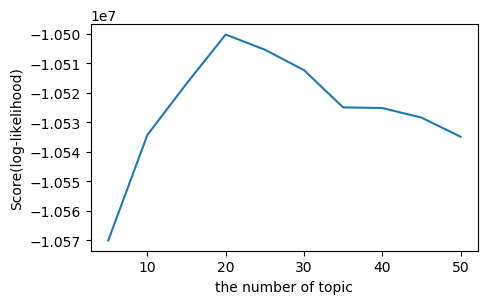

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100
plt.figure(figsize=(5,3))
plt.plot(k, score_list)
plt.ylabel('Score(log-likelihood)')
plt.xlabel('the number of topic')
plt.show()

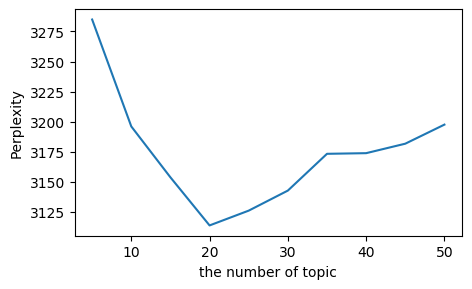

In [10]:
plt.figure(figsize=(5,3))
plt.plot(k, perplexity_list)
plt.ylabel('Perplexity')
plt.xlabel('the number of topic')
plt.show()

## 開始建模

In [11]:
lda = LatentDirichletAllocation(n_components=20, learning_method='batch', max_iter=25, random_state=0)
doc_topic = lda.fit_transform(cv_features)

In [12]:
doc_topic

array([[6.08272520e-05, 6.08272516e-05, 1.01047224e-01, ...,
        6.08272518e-05, 6.08272515e-05, 6.08272518e-05],
       [1.79211473e-04, 1.79211474e-04, 9.94230711e-02, ...,
        8.44717154e-02, 1.79211474e-04, 1.79211475e-04],
       [7.04391640e-02, 7.50750758e-05, 7.50750770e-05, ...,
        1.28379394e-01, 7.50750761e-05, 7.50750766e-05],
       ...,
       [8.63557873e-05, 2.62004318e-02, 4.35764055e-01, ...,
        1.06376478e-01, 8.63557872e-05, 8.63557882e-05],
       [4.73484855e-05, 3.18814054e-02, 4.73484860e-05, ...,
        4.73484860e-05, 4.73484855e-05, 4.73484858e-05],
       [4.32525960e-05, 4.32525962e-05, 2.24235940e-01, ...,
        4.32525962e-05, 4.32525958e-05, 4.32525961e-05]])

In [13]:
topic_word = lda.components_

In [14]:
topic_word

array([[5.21864310e+01, 3.52207978e+01, 3.57130457e+01, ...,
        5.00000001e-02, 2.31096045e+01, 1.99792657e+00],
       [1.02043944e+01, 5.77063527e+01, 1.10508466e+01, ...,
        5.00000016e-02, 5.00000014e-02, 5.00000008e-02],
       [4.97322847e+01, 1.30832062e+02, 1.34277240e+02, ...,
        5.00000011e-02, 5.00098773e-02, 5.00000016e-02],
       ...,
       [5.00000011e-02, 6.45411619e+01, 3.35275373e+01, ...,
        5.23305649e+00, 5.00000013e-02, 2.83715125e+01],
       [5.00000013e-02, 4.99541099e+01, 3.44689889e+01, ...,
        5.00000000e-02, 1.49382876e+00, 2.16887784e+01],
       [5.00000010e-02, 5.06918761e+01, 4.18440877e+00, ...,
        5.00000008e-02, 2.81296990e+01, 5.00000010e-02]])

## 建模結果
argsort() 預設由小排到大 <br>
argsort()[::-1] 由大排到小

In [15]:
n_top_words = 20
for i in range(len(topic_word)):
    print("主題:",i)
    print([cv.get_feature_names()[index] for index in topic_word[i].argsort()[::-1][:n_top_words]])

主題: 0
['細胞', '基因', '生物', 'dna', '分子', '生命', '細菌', '植物', '人類', '製造', '環境', '蛋白質', '微生物', '產生', '結構', '實驗室', '蜜蜂', '病毒', '材料', '昆蟲']
主題: 1
['影片', '電影', '觀眾', '節目', '漫畫', '製作', '這部', '文字', '密碼', '電視', '伊朗', '畫面', '拍攝', '角色', '喜歡', '眾笑', '有趣', '像是', '出現', '一部']
主題: 2
['食物', '能源', '汽車', '石油', '燃料', '安全', '解決', '減少', '太陽能', '環境', '小時', '飛機', '電力', '產生', '車子', '計畫', '駕駛', '未來', '能量', '製造']
主題: 3
['電腦', '科技', '機器人', '機器', '系統', '設計', '技術', '手機', '進行', '製造', '工具', '軟體', '未來', '創造', '運作', '產品', '發明', '程式', '資訊', '公司']
主題: 4
['城市', '設計', '建築', '空間', '建築物', '社區', '建造', '設計師', '創造', '地圖', '房子', '紐約', '建築師', '公共', '像是', '都市', '環境', '中心', '街道', '變成']
主題: 5
['印度', '意識', '因爲', '自我', '黑人', '塑膠', '專利', '認爲', '存在', '亞當', '現實', '輪椅', '成爲', '體驗', '定義', '白人', '回收', '印度人', '傳統', '記憶']
主題: 6
['國家', '經濟', '發展', '社會', '中國', '全球', '非洲', '市場', '人口', '投資', '未來', '政府', '成長', '公司', '企業', '提供', '解決', '影響', '創造', '資源']
主題: 7
['地球', '海洋', '照片', '生物', '人類', '火星', '太空', '進行', '拍攝', '這張', '探索', '保護', '星球', '衛星', '生命', '英尺'

## doc-topic 機率分佈

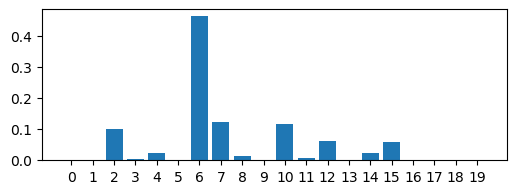

In [16]:
import matplotlib.pyplot as plt
x = [str(i) for i in range(20)]
plt.figure(figsize=(6,2))
plt.bar(x, doc_topic[0])
plt.show()

# 文本最大機率主題分佈情形

In [17]:
doc_top_topic = []
for i in range(len(doc_topic)):
    doc_top_topic.append(doc_topic[i].argmax())

In [18]:
from collections import Counter
Counter(doc_top_topic)

Counter({6: 171,
         4: 56,
         9: 114,
         3: 152,
         10: 152,
         15: 438,
         0: 85,
         2: 105,
         18: 42,
         17: 142,
         7: 71,
         14: 53,
         12: 33,
         19: 88,
         11: 68,
         8: 59,
         13: 111,
         16: 47,
         5: 8,
         1: 18})

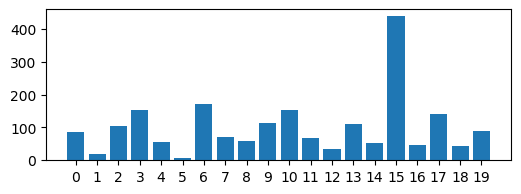

In [19]:
x = [str(i) for i in range(20)]
y = dict(sorted(Counter(doc_top_topic).items())).values()
plt.figure(figsize=(6,2))
plt.bar(x, y)
plt.show()

# 文本主題相似度

## Cosine Similarity

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(doc_topic)

array([[1.00000000e+00, 1.44143612e-01, 2.26142829e-01, ...,
        4.41664532e-01, 6.23160713e-02, 7.42661971e-01],
       [1.44143612e-01, 1.00000000e+00, 4.81749359e-02, ...,
        3.55080082e-01, 4.21078927e-01, 5.50269830e-01],
       [2.26142829e-01, 4.81749359e-02, 1.00000000e+00, ...,
        1.25735178e-01, 4.34005165e-04, 1.53962454e-01],
       ...,
       [4.41664532e-01, 3.55080082e-01, 1.25735178e-01, ...,
        1.00000000e+00, 1.46892225e-01, 6.35114392e-01],
       [6.23160713e-02, 4.21078927e-01, 4.34005165e-04, ...,
        1.46892225e-01, 1.00000000e+00, 6.28410770e-02],
       [7.42661971e-01, 5.50269830e-01, 1.53962454e-01, ...,
        6.35114392e-01, 6.28410770e-02, 1.00000000e+00]])

In [21]:
cosine_similarity(doc_topic)[0].argsort()[::-1]

array([   0,  978, 1885, ..., 1197, 1797, 1746])

## 觀察 cosine similarity 高的 doc-topic 機率分佈

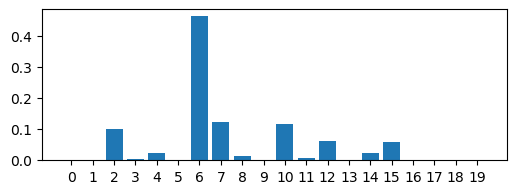

In [22]:
x = [str(i) for i in range(20)]
plt.figure(figsize=(6,2))
plt.bar(x, doc_topic[0])
plt.show()

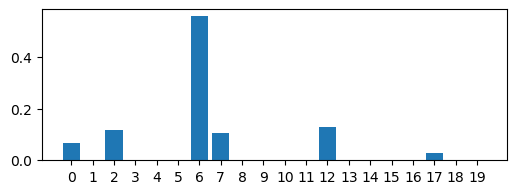

In [23]:
x = [str(i) for i in range(20)]
plt.figure(figsize=(6,2))
plt.bar(x, doc_topic[978])
plt.show()

In [24]:
doc_list[0]

'各位要是在猜想我穿的是什麼... 不，我穿的不是裙子， 但，我也不會告訴各位 我裡面穿什麼。\n（笑聲）\n這是「幗」。 這是我們國家的傳統服飾。 不丹的男人都是這樣穿， 我們的女人是這樣穿。 我們男生穿的跟女生一樣， 服飾都相當亮眼， 但我們跟女生不同的地方是， 我們可以炫耀一下美腿。\n（笑聲）\n我們國家的傳統服飾相當獨特， 但這不是我們國家唯一的特點。 我們對「維持碳平衡」的承諾 也相當獨特， 而這就是我今天要談的事： 我們對「維持碳平衡」的承諾。\n但在往下解釋之前， 我先跟各位介紹一下我國。 我想先說我們的故事。\n不丹是在喜馬拉雅山上的一個小國家。 我們被稱呼為「香格里拉」， 甚至是世界上最後一個香格里拉。 但我要先說清楚，我們不是香格里拉。 我們的國家不是一個 開心和尚滿街跑的國家。\n（笑聲）\n真實的情況是， 我們國家不到 70 萬的人口， 被夾在全球人口最多的兩個國家 中國和印度之間。 真實的情況是， 我們是一個低度開發小國， 盡我們所能的維持生存。 但我們做的還不錯，我們存活下來了。 實際上，我們是興盛的， 我們興盛的原因是 有英明的國王保佑著我們。 我們英明的君王孜孜不倦地 發展我們的國家， 小心翼翼地將經濟成長 與社會發展、環境永續， 以及文化保存維持平衡。 全部都有一個很好的管理架構。 我們稱呼這個整體發展的成就 叫做「國民幸福總值」，簡稱GNH。 回到1970年， 我們第四任著名的國王 向不丹人民說明 國民幸福總值比國民生產總值重要。\n（掌聲）\n自此之後， 所有不丹的發展 都以GNH為基礎， 這個前衛遠見的宗旨 是促進人民幸福與福利。\n但說比做容易， 特別是，當你只是全世界 最小的一個經濟體時。 我們全國的國民生產總值不到20億美金。 我知道在座有些人的財產比這多很多。\n（笑聲）\n個人賺的 甚至比我國加總起來還要多。\n所以，我們的經濟體很小， 但這也是有趣的地方。 我們的教育完全免費。 全體人民享有免費的學校教育， 更努力工作的人享有免費的大學教育。 衛生保健也是完全免費。 看醫生、醫療、吃藥： 全部由政府提供。 我們能夠做到這些， 是因為我們很小心翼翼地 使用我們有限的資源， 因為我們忠於GNH的核心任務， 也就是有價值的發展。 我們的經濟體小， 而我們必須強化它。 經濟成長很重要， 但經濟成長不能建立在 破壞我們的獨

In [27]:
doc_list[978]

'我在這想要告訴大家 關於大自然隱藏的經濟 壞消息是 大地之母的會計部門還沒開始運作 所以這些帳單沒有辦法被開出來。 不過我們還是要為了這個問題做些事情 我一開始是從事市場領域 之後持續對此抱持著興趣 但是我近期的努力 都是專注在 人類從大自然取得資產的價值 那些在市場上還沒有標價的部分\n在2007年我們開始一個叫做TEEB的計劃 是由一群G8+5的環境部長們 (編者註:G8+5指的是原來的八大工業國 : 加拿大,法國,德國,義大利,日本,俄國,美國與英國 再加上五個新興國 : 巴西,中國,印度,墨西哥與南非) 所發起 他們初步的靈感 是來自氣候變化經濟學家斯特恩爵士所提出的報告 他們問自己一個問題： 如果經濟學可以提出這麼有說服力的理論 讓大家對氣候變遷及早行動, 為什麼這不能也用在保育上？ 為什麼相同的例子不能也用在 大自然上 而這個答案是：是的，是可以的 但是不是那麼的直接了當 生物多樣性，這個星球上的各種組成不是汽油 這出現在多種層次裡 生態系統、物種和基因，跨越了很多等級 國際性的、國家級的、當地的、社群的 對大自然做 像斯特恩爵士及他的團隊當初為了大自然做的那些,並不簡單\n儘管如此，我們還是開始了 這份計畫是先從臨時報告開始 很快地，許多研究人員 把很多關於這個主題的資訊 都收集在一起 在這份整合的報告中 有個非常驚人的啟示 那就是,事實上,我們正在失去自然資本 那些從大自然流向我們的利益。 我們正已非常驚人的速度失去 事實上，是價值兩到四萬億美元的 天然資本 這份報告在2008年寫成 剛好是在財務危機報告顯示 我們已經失去財務資本的時候 兩點五萬億美元財物資本的時候 所以這是可以相對比較的損失。 我們便開始四處演講 向國際社群 各國政府 地方政府和企業體 向群眾,向你和我, 做了完整報告，去年也在聯合國發表 裡頭說明了自然的隱藏經濟 也說明了怎麼樣做可以解決這個問題\n這是關於什麼的呢? 這是一張你們很熟悉的圖片 亞馬遜雨林 這是一個巨大的碳倉儲，也是一個驚人的生物多樣性的倉儲， 但人們不知道的 是它其實也是一個降雨工廠 因為東北季風 吹送過亞馬遜時 會有效的收集水蒸氣 每天大約20億多噸的水蒸氣 都被吸到這東北季風裡， 而最終成為雨的型態 穿過整個拉普拉塔流域 這個降雨週期,這個降雨工廠 有效的滋養了整個農業經濟 價值240億美元 在整個拉丁美洲

# LDA 視覺化
pip install pyldavis

In [26]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [27]:
pyLDAvis.sklearn.prepare(lda, cv_features, cv)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.106955 -0.071115       1        1  14.898447
6      0.038841  0.119010       2        1   9.880329
17    -0.010182 -0.027111       3        1   8.792546
3     -0.079720 -0.037890       4        1   7.524495
10     0.129083  0.102515       5        1   6.911935
9      0.000378  0.109912       6        1   5.403392
13    -0.135355 -0.131335       7        1   5.287204
2      0.002537  0.066603       8        1   5.028278
19    -0.031398 -0.036207       9        1   4.599050
0     -0.170901  0.055943      10        1   4.038572
7     -0.104758  0.098112      11        1   3.689797
11     0.053773  0.036171      12        1   3.688417
8      0.175486 -0.009808      13        1   3.631678
16     0.096008 -0.053198      14        1   3.422252
14     0.226367  0.042661      15        1   3.257482
4     -0.040018 -0.074689      16        1   2.982380
18    -0.171522  0.019932      17        1   2.729275
12    -0.091772  0.147007      18        1   2.075941
1      0.038964 -0.214213      19        1   1.351951
5     -0.032767 -0.142300      20        1   0.806581, topic_info=     Term         Freq        Total Category  logprob  loglift
2481   孩子  2742.000000  2742.000000  Default  30.0000  30.0000
6572   設計  3062.000000  3062.000000  Default  29.0000  29.0000
2392   女性  1526.000000  1526.000000  Default  28.0000  28.0000
2122   城市  1618.000000  1618.000000  Default  27.0000  27.0000
777    人類  3346.000000  3346.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
4352   概念    44.698422  1182.347683  Topic20  -5.4620   1.5448
578    中心    40.251084   837.221453  Topic20  -5.5668   1.7852
7237   過程    40.806709  1642.865024  Topic20  -5.5531   1.1248
6425   製造    38.716433  1345.871642  Topic20  -5.6056   1.2716
5435   真實    37.677217   771.660635  Topic20  -5.6329   1.8006

[1279 rows x 6 columns], token_table=      Topic      Freq Term
term                      
51        1  0.119813   20
51        2  0.260869   20
51        3  0.027192   20
51        4  0.062031   20
51        5  0.068829   20
...     ...       ...  ...
7950     17  0.988857   黑洞
7950     19  0.006142   黑洞
7951     18  0.996343  黑猩猩
7960      2  0.047962   黨派
7960      5  0.935258   黨派

[7387 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 7, 18, 4, 11, 10, 14, 3, 20, 1, 8, 12, 9, 17, 15, 5, 19, 13, 2, 6])